# 1.3 Gradient Descent for Temperatures

## 1. Import libraries and load data

In [5]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [6]:
#Create a path to where your data is stored.
path = r'C:\Users\User\250216_ClimateWins Analysis\Data Sets'

In [7]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_prediction_dataset_scaled.csv'))
climate

Unnamed: 0        id      DATE  MONTH  BASEL_cloud_cover  \
0               0 -1.731975  19600101      1           0.660514   
1               1 -1.731824  19600102      1           0.244897   
2               2 -1.731673  19600103      1           1.076130   
3               3 -1.731523  19600104      1          -1.001953   
4               4 -1.731372  19600105      1           0.244897   
...           ...       ...       ...    ...                ...   
22945       22945  1.731372  20221027     10          -1.833187   
22946       22946  1.731523  20221028     10           0.244897   
22947       22947  1.731673  20221029     10          -0.586336   
22948       22948  1.731824  20221030     10          -0.170720   
22949       22949  1.731975  20221031     10          -0.170720   

       BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0              -0.02793        0.826097       -0.001949   
1              -0.02793        0.735760       -0.001949   
2              -0.02793        1.277781       -0.001949   
3              -0.02793        1.458455       -0.001949   
4              -0.02793        1.729466       -0.001949   
...                 ...             ...             ...   
22945          -0.02793        0.284075        1.037367   
22946          -0.02793        0.103401        0.976231   
22947          -0.02793        0.013064        0.716402   
22948          -0.02793        0.374412        0.487141   
22949          -0.02793        0.735760        0.196744   

       BASEL_global_radiation  BASEL_precipitation  ...  VALENTIA_cloud_cover  \
0                   -1.101066            -0.265148  ...             -0.443701   
1                   -1.058108             1.658760  ...              0.783085   
2                   -1.251420             0.155707  ...              0.783085   
3                   -0.821838            -0.445514  ...              0.783085   
4                   -0.746661            -0.164944  ...             -1.670486   
...                       ...                  ...  ...                   ...   
22945               -0.005632            -0.004619  ...             -0.443701   
22946               -0.005632            -0.004619  ...             -0.443701   
22947               -0.005632            -0.004619  ...             -0.443701   
22948               -0.005632            -0.004619  ...             -0.443701   
22949               -0.005632            -0.004619  ...             -0.443701   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.761754          -1.299744                  -0.806427   
1               1.183580          -1.262455                  -1.042055   
2               1.183580          -0.432779                  -1.136306   
3               0.480538           0.387574                  -1.183432   
4              -0.363113           1.729970                  -0.794645   
...                  ...                ...                        ...   
22945          -0.081896          -0.003958                  -0.005290   
22946          -0.081896          -0.003958                  -0.005290   
22947          -0.081896          -0.003958                  -0.005290   
22948          -0.081896          -0.003958                  -0.005290   
22949          -0.081896          -0.003958                  -0.005290   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                   -0.088407            -0.024706           0.372147   
1                    0.503361            -0.024706          -0.829285   
2                   -0.396127            -0.024706          -1.009500   
3                    0.669056            -0.024706          -1.039536   
4                   -0.490810            -0.024706           0.672505   
...                       ...                  ...                ...   
22945               -0.005560            -0.024706          -0.018319   
22946               -0.005560            -0.024

In [8]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [9]:
df

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101      1        -0.528623           -1.016876   
1      19600102      1        -0.582946           -1.107669   
2      19600103      1        -0.257010           -1.084971   
3      19600104      1        -0.555784           -1.209812   
4      19600105      1        -1.003946           -1.209812   
...         ...    ...              ...                 ...   
22945  20221027     10         0.747959            0.628750   
22946  20221028     10         0.856604            0.367720   
22947  20221029     10         0.856604            0.083991   
22948  20221030     10         0.680055            0.265577   
22949  20221031     10         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0 

In [10]:
#You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.

In [11]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

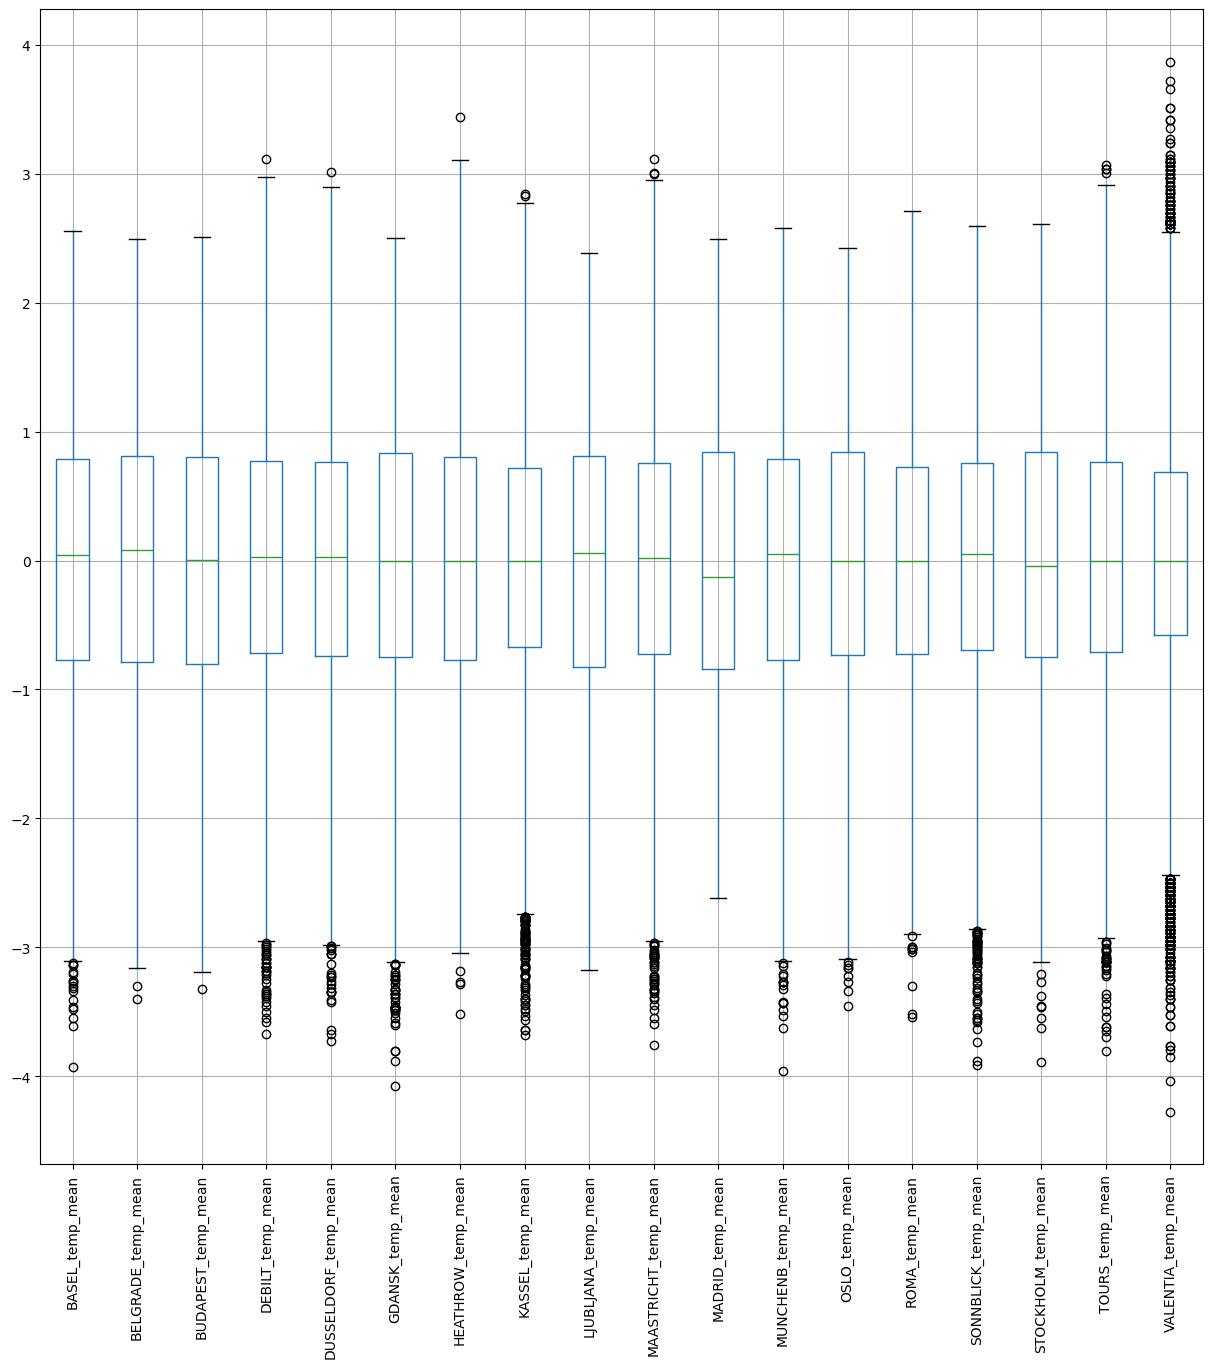

In [12]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

### Madrid 1960

In [291]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1960')] #<-----INSERT YEAR HERE
dfyear

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0    19600101      1        -0.528623           -1.016876           -1.099163   
1    19600102      1        -0.582946           -1.107669           -1.110927   
2    19600103      1        -0.257010           -1.084971           -1.063873   
3    19600104      1        -0.555784           -1.209812           -1.146217   
4    19600105      1        -1.003946           -1.209812           -1.087400   
..        ...    ...              ...                 ...                 ...   
361  19601227     12        -1.289140           -1.277907           -1.440302   
362  19601228     12        -1.289140           -1.255208           -1.416775   
363  19601229     12        -1.207656           -1.221161           -1.122690   
364  19601230     12        -1.547172           -1.243859           -1.169744   
365  19601231     12        -1.139752           -1.107669           -1.216797   

     DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0           -0.114356             -0.105836         -0.927601   
1           -0.367511             -0.370915         -0.825294   
2           -0.509912             -0.532908         -0.940389   
3           -0.525734             -0.577088         -1.042696   
4           -0.320045             -0.444548         -0.978754   
..                ...                   ...               ...   
361         -1.126979             -0.974707         -0.940389   
362         -1.522534             -1.283966         -0.978754   
363         -1.570001             -1.313420         -1.234521   
364         -1.316845             -1.372326         -0.889236   
365         -1.032045             -1.048340         -1.145003   

     HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0             -0.106469         -0.182904            -1.370824   
1             -0.892676         -0.212437            -1.043881   
2             -0.490837         -0.389635            -0.741156   
3             -0.316124         -0.493001            -0.910682   
4             -0.403481         -0.552067            -0.862246   
..                  ...               ...                  ...   
361           -1.469228         -0.891697            -1.721985   
362           -1.469228         -1.054129            -1.479805   
363           -1.434286         -1.305160            -1.443478   
364           -1.084860         -1.393759            -1.273952   
365           -1.137274         -1.172261            -1.286061   

     MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
0               -0.097084         -0.988280           -0.265742   
1               -0.232112         -0.691740           -0.353714   
2               -0.487164         -0.853490           -0.403983   
3               -0.472161         -0.624345           -0.642763   
4               -0.307127         -0.381721           -0.906678   
..                    ...               ...                 ...   
361             -0.997267         -1.069155           -1.120324   
362             -1.342338         -1.338737           -1.321402   
363             -1.342338         -0.920885           -1.459643   
364             -1.177304         -0.772615           -1.547614   
365             -0.937255         -1.136550           -1.195728   

     OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  \
0         -0.186575       -1.280450            -0.124331            -0.391072   
1         -0.368598       -0.539569            -0.650834            -0.415953   
2         -0.550620       -0.876333            -0.650834            -0.615003   
3         -0.417137       -0.775304            -0.943336            -0.764290   
4         -0.332193       -0.926848            -0.621584            -0.503037   
..              ...             ...                  ...                  ...   
361       -0.417137       -1.785596            -0.914086            -0.403513   
362      

In [293]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.960067e+07    6.513661        -0.102317           -0.032384   
std    3.457653e+02    3.455958         0.935826            0.920271   
min    1.960010e+07    1.000000        -3.190431           -2.401472   
25%    1.960040e+07    4.000000        -0.756099           -0.594120   
50%    1.960070e+07    7.000000        -0.053300            0.055618   
75%    1.960098e+07    9.750000         0.649499            0.662798   
max    1.960123e+07   12.000000         1.820830            1.843109   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
std              0.946637          0.910451              0.919531   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
std            0.978767            0.919195          0.964448   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
std               0.906193              0.902235          0.979590   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
std              0.938523        0.998018        1.002362   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
std               0.884235             0.988702         0.944029   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
std              1.127911  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381

In [295]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.

In [297]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

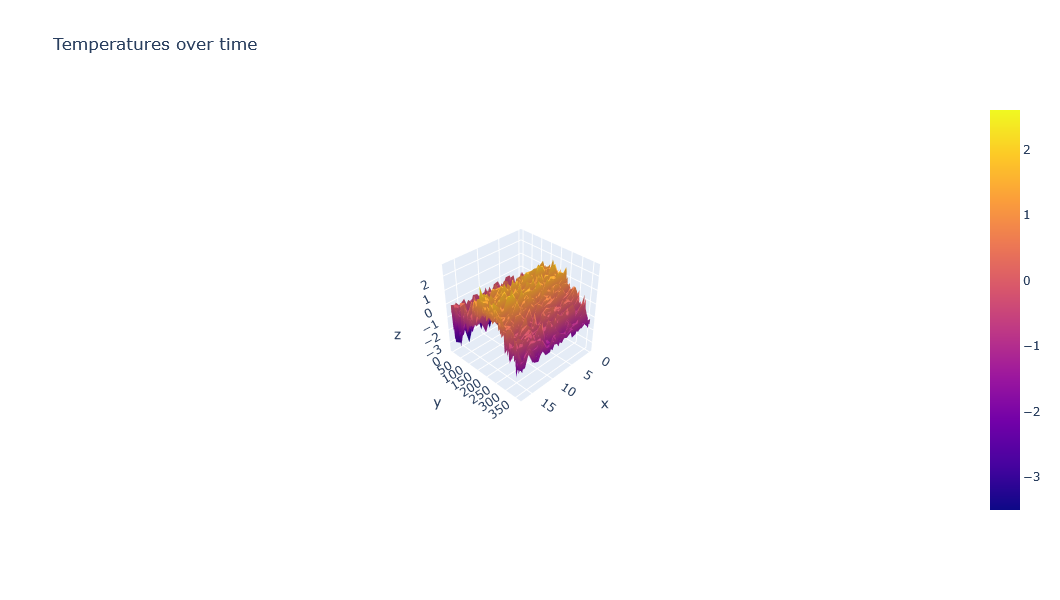

In [299]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [307]:
# Determine the number of days in the year from the DataFrame
n_rows = dfyear.shape[0]  # 365 for non-leap years or 366 for leap years

# Create an index scaled by 0.01.
# This will generate values from 0.01 to (n_rows * 0.01) with exactly n_rows points.
i = np.linspace(0.01, n_rows * 0.01, n_rows)

# Create a DataFrame for the index
index = pd.DataFrame(data=i, columns=['index'])

# Build the X matrix for the optimization function
# Convert the index to a numpy array and reshape to (n_rows, 1)
X = index.to_numpy().reshape(n_rows, 1)
# Create a column of ones for the intercept term
ones = np.ones((n_rows, 1))
# Concatenate the ones with the index values
X = np.concatenate((ones, X), axis=1)

# Build the y vector using the chosen weather station data
y = dfyear['MADRID_temp_mean'].to_numpy().reshape(n_rows, 1)


In [309]:
X.shape, y.shape

((366, 2), (366, 1))

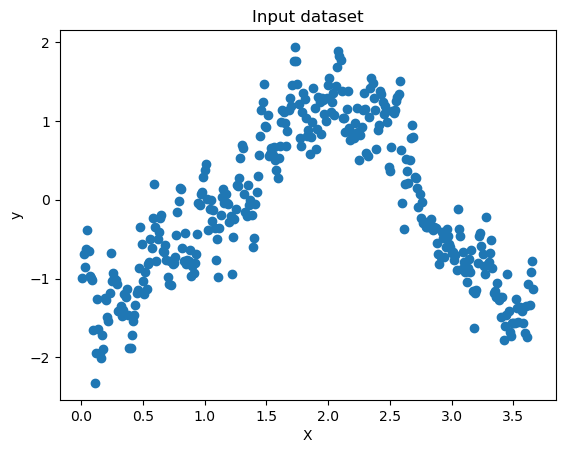

In [311]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['MADRID_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [313]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].min()

-2.322710316206882

In [315]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['MADRID_temp_mean'].max()

1.9366821017377809

In [317]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [319]:
compute_cost(X,y)

array([0.48699971])

In [321]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [323]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-5],[-1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 172 ms
Wall time: 180 ms


In [325]:
theta

array([[-0.72486563],
       [ 0.27551163]])

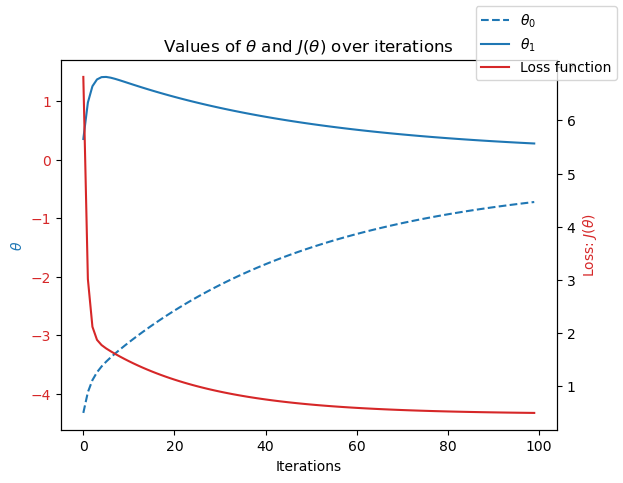

In [327]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [328]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 6.5 s
Wall time: 6.55 s


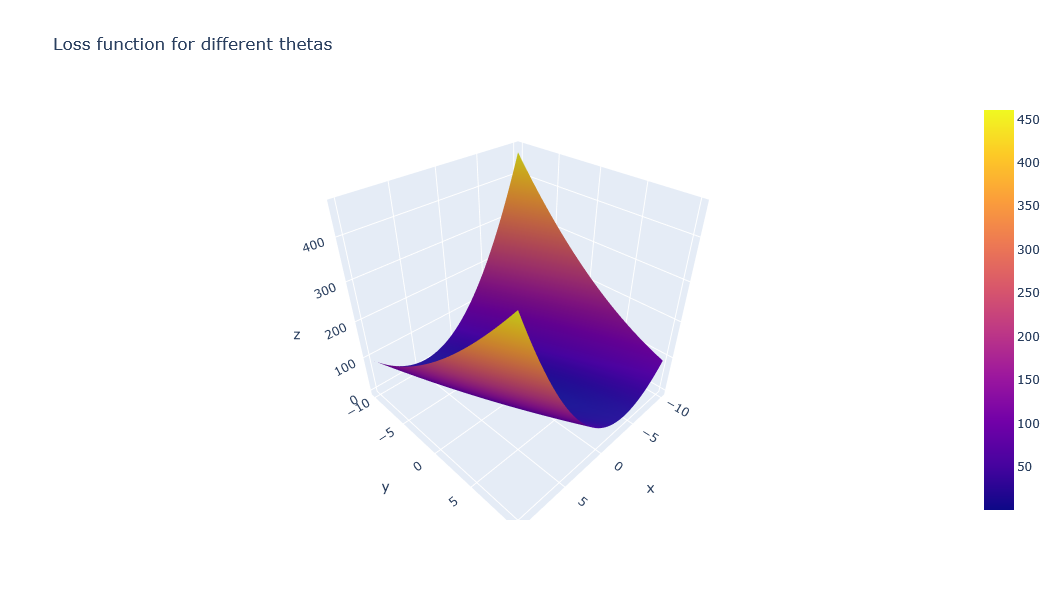

In [330]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

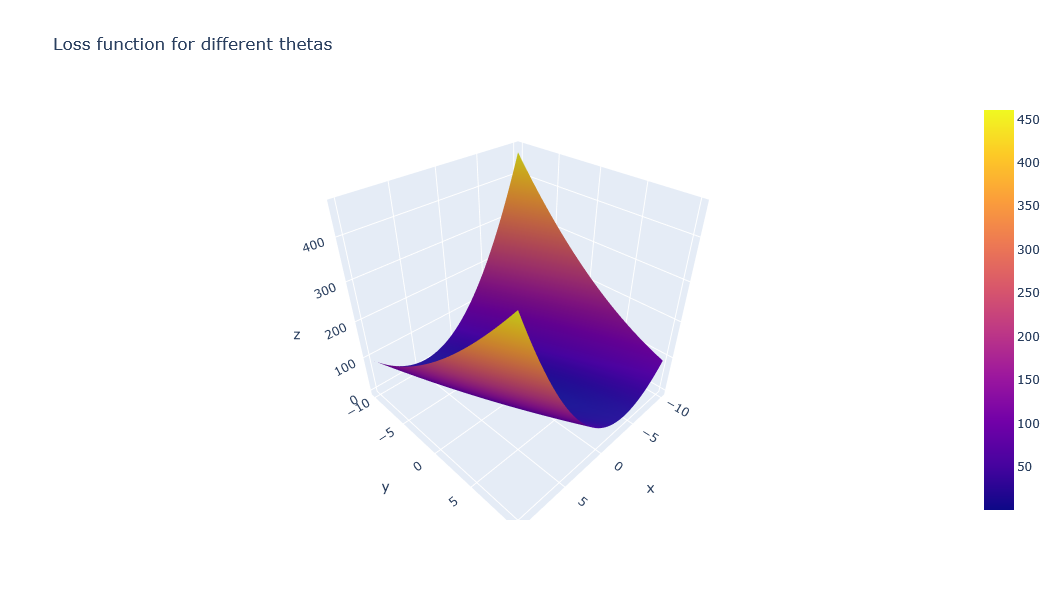

In [331]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [332]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

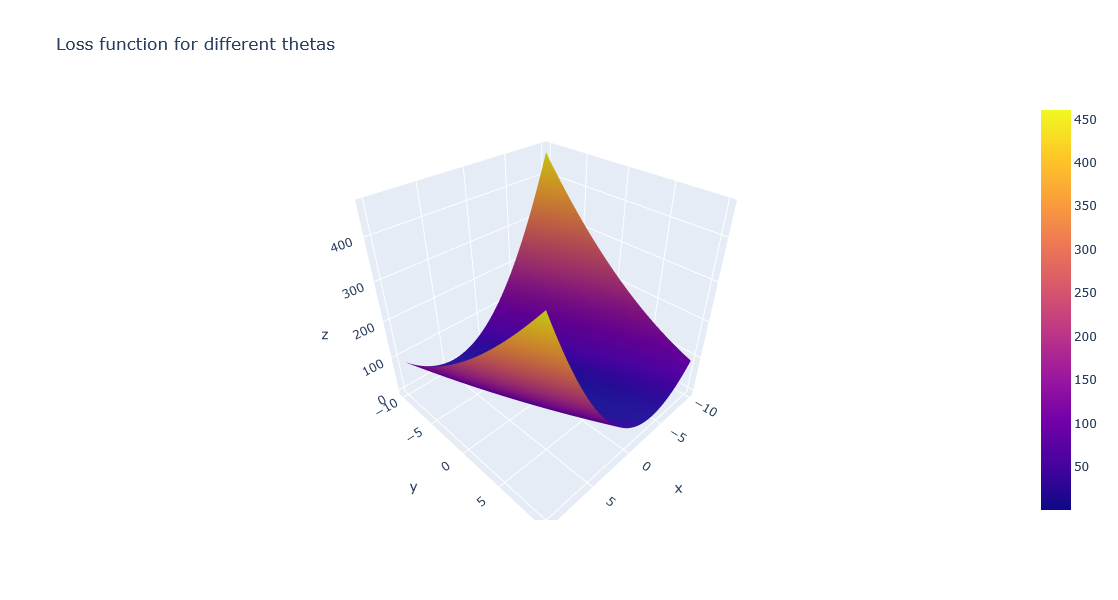

In [333]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [334]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

In [38]:
#How well does gradient descent converge? How much do you need to adjust between different weather stations and years?

### Madrid 1989 

In [40]:
#Reduce your dataset to a single year
dfyear2 = df[df['DATE'].astype(str).str.contains('1989')] #<-----INSERT YEAR HERE
dfyear2

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
10593  19890101      1        -1.316301           -1.164415   
10594  19890102      1        -1.452108           -1.334652   
10595  19890103      1        -1.357043           -1.618381   
10596  19890104      1        -1.465688           -1.607032   
10597  19890105      1        -1.058269           -1.958855   
...         ...    ...              ...                 ...   
10953  19891227     12        -1.533592           -1.289256   
10954  19891228     12        -1.560753           -1.311954   
10955  19891229     12        -1.642237           -1.448144   
10956  19891230     12        -1.696559           -1.414096   
10957  19891231     12        -1.710140           -1.516239   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
10593           -1.028583         -0.430800             -0.621268   
10594           -1.169744         -0.683956             -0.724354   
10595           -1.475592         -1.206090             -1.107247   
10596           -1.628516         -1.095334             -0.812714   
10597           -1.828494         -0.826356             -0.842167   
...                   ...               ...                   ...   
10953           -1.675570         -1.522534             -1.298693   
10954           -1.675570         -1.395957             -1.342873   
10955           -1.499119         -1.538357             -1.387053   
10956           -1.428538         -1.633290             -1.401779   
10957           -1.405012         -1.506712             -1.593226   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
10593         -0.620680           -0.665550         -0.552067   
10594         -0.927601           -0.717963         -0.625900   
10595         -0.748564           -0.875205         -1.201794   
10596         -1.145003           -0.560722         -1.157495   
10597         -0.889236           -0.875205         -0.876931   
...                 ...                 ...               ...   
10953         -1.157791           -0.840262         -1.438059   
10954         -1.387982           -0.822791         -1.482358   
10955         -1.311252           -1.084860         -1.762922   
10956         -1.145003           -1.189688         -1.718623   
10957         -1.324040           -1.294515         -1.615257   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
10593            -1.479805             -0.667200         -1.042197   
10594            -1.407151             -0.667200         -1.230904   
10595            -1.600895             -1.327334         -1.473528   
10596            -1.818857             -0.952258         -1.635277   
10597            -1.721985             -0.862240         -1.473528   
...                    ...                   ...               ...   
10953            -1.322388             -1.282325         -0.880448   
10954            -1.395042             -1.432356         -0.840010   
10955            -1.540350             -1.387347         -0.732178   
10956            -1.685658             -1.447359         -0.705220   
10957            -1.431369             -1.492368         -0.853490   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
10593           -1.321402       -0.720508       -1.718244   
10594           -0.956948       -0.805452       -1.600376   
10595           -1.183161       -0.914666       -1.650891   
10596           -1.333969       -0.841857       -1.886626   
10597           -1.019785       -0.671969       -1.836111   
...                   ...             ...             ...   
10953           -1.497345       -0.720508       -1.869787   
10954           -1.560182       -1.375790       -1.852949   
10955           -1.660721       -1.533543       -1.903464   
10956           -1.761260       -1.169498       -1.768758   
10957           -1.886934       -1.654892       -1.852949   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
10

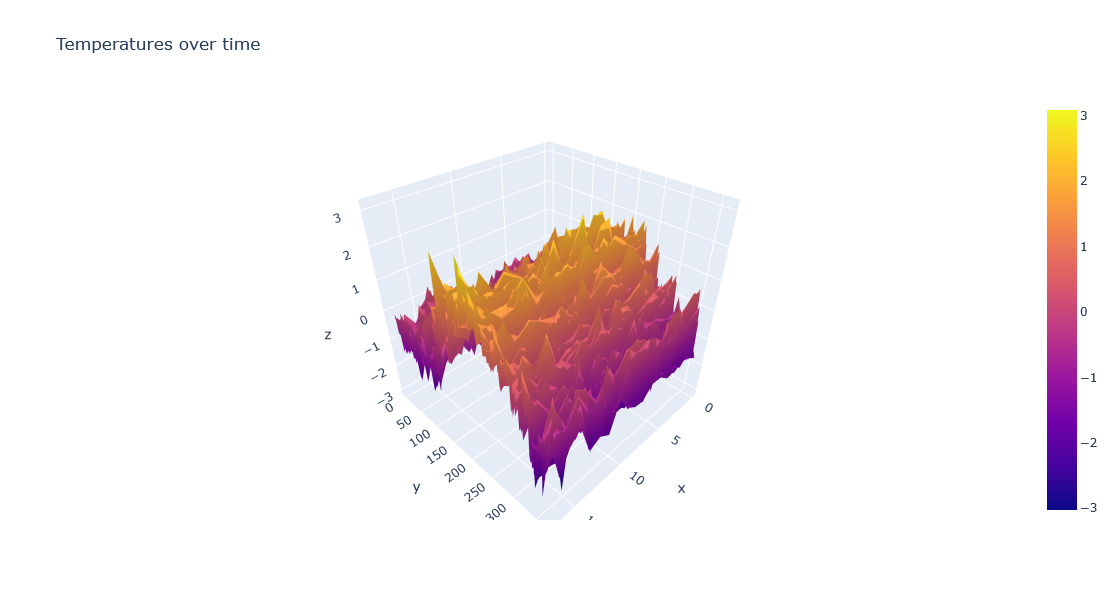

In [41]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear2 = dfyear2.drop(['DATE','MONTH'], axis=1)

#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear2.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [42]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

In [43]:
n_rows2 = dfyear2.shape[0]
n_rows2

365

In [44]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows2,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows2,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear2['MADRID_temp_mean'].to_numpy().reshape(n_rows2,1) #<----INSERT WEATHER STATION HERE

In [45]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear2['MADRID_temp_mean'].min()

-1.635276729766446

In [46]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear2['MADRID_temp_mean'].max()

2.0445148211794177

In [47]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [48]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [49]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 172 ms
Wall time: 176 ms


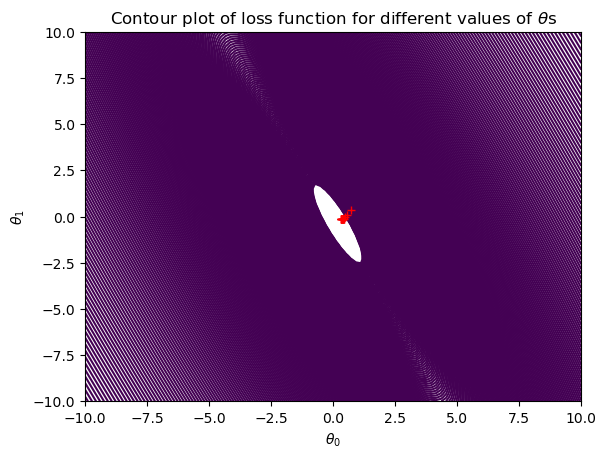

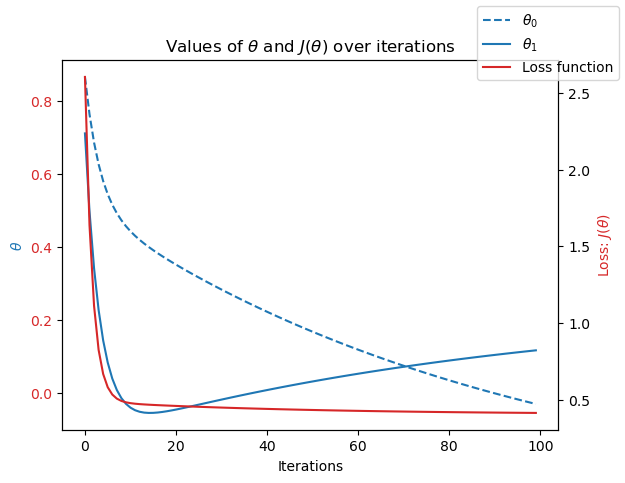

In [50]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [51]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 6.94 s
Wall time: 6.99 s


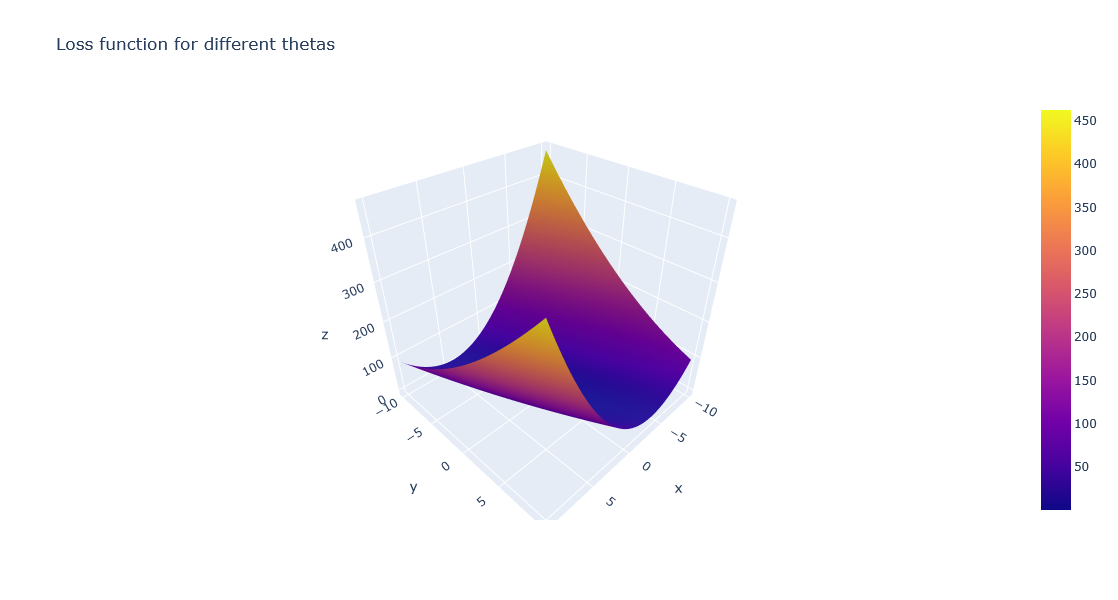

In [52]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### Madrid 2020

In [342]:
#Reduce your dataset to a single year
dfyear3 = df[df['DATE'].astype(str).str.contains('2020')] #<-----INSERT YEAR HERE
dfyear3

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
762    19620201      2        -2.076818           -1.765920   
763    19620202      2        -1.615075           -1.731872   
764    19620203      2        -1.941011           -1.731872   
765    19620204      2        -1.343462           -1.572984   
766    19620205      2        -0.515042           -1.209812   
...         ...    ...              ...                 ...   
22681  20220205      2        -0.936043           -0.642354   
22682  20220206      2        -0.528623           -0.562910   
22683  20220207      2        -0.854559           -0.426721   
22684  20220208      2        -0.868139           -0.869337   
22685  20220209      2        -0.759494           -0.517514   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
762             -1.628516         -1.506712             -1.858305   
763             -1.675570         -1.332668             -1.490139   
764             -1.275614         -1.348490             -1.387053   
765             -1.334431         -0.968756             -1.018887   
766             -1.381485         -0.604845             -0.768534   
...                   ...               ...                   ...   
22681           -0.005167         -0.573200             -0.812714   
22682           -0.005167         -0.414978             -0.606541   
22683           -0.005167         -0.589023             -0.812714   
22684           -0.005167         -0.003600             -0.326735   
22685           -0.005167         -0.177645             -0.297282   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
762           -2.142495           -1.364400         -1.984420   
763           -1.682114           -1.014975         -1.260860   
764           -1.260098           -0.875205         -1.334693   
765           -1.042696           -0.892676         -1.113195   
766           -0.991543           -0.945090         -0.699732   
...                 ...                 ...               ...   
22681         -0.505585           -0.822791         -0.005705   
22682         -0.505585           -0.613136         -0.005705   
22683         -0.556739           -0.875205         -0.005705   
22684         -0.543950           -0.525779         -0.005705   
22685         -0.224241           -0.036584         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
762              -1.818857             -1.612392         -1.230904   
763              -1.806748             -1.417353         -1.123071   
764              -1.685658             -1.387347         -0.920885   
765              -1.310279             -0.967261         -0.866969   
766              -0.922791             -0.562179         -0.772615   
...                    ...                   ...               ...   
22681            -0.571630             -0.757219         -0.610866   
22682            -0.692720             -0.607188         -0.880448   
22683            -0.438431             -0.847237         -0.691740   
22684            -0.511085             -0.292124         -0.610866   
22685            -0.438431             -0.367139         -0.664782   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
762             -2.402196       -0.756913       -2.206552   
763             -1.635586       -1.545678       -2.223390   
764             -1.648153       -1.048149       -1.987655   
765             -1.258565       -0.696239       -1.768758   
766             -0.667898       -0.769048       -1.617214   
...                   ...             ...             ...   
22681           -0.705600       -0.756913       -0.000746   
22682           -0.542224       -0.769048       -0.000746   
22683           -0.919246       -0.696239       -0.000746   
22684           -0.605061       -0.441407       -0.000746   
22685           -0.454253       -0.489946       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
76

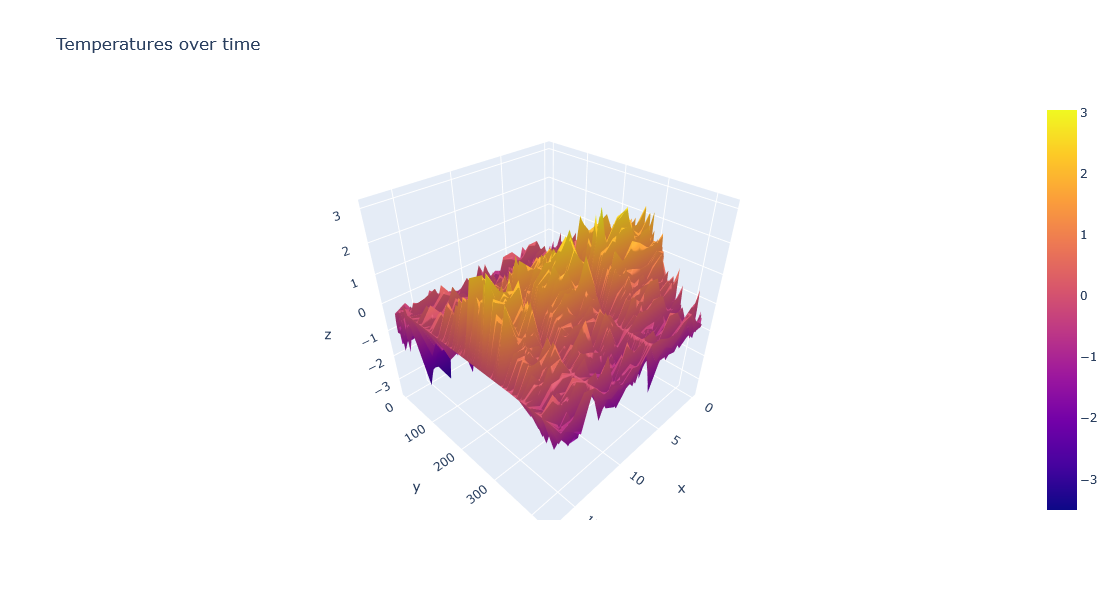

In [344]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear3 = dfyear3.drop(['DATE','MONTH'], axis=1)

#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear3.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [352]:
# Determine the number of days from the DataFrame (e.g., 429 days)
n_rows3 = dfyear3.shape[0]

# Create an index scaled by 0.01. This will generate values from 0.01 to n_rows3*0.01 with exactly n_rows3 points.
i = np.linspace(0.01, n_rows3 * 0.01, n_rows3)

# Create a DataFrame for the index
index = pd.DataFrame(data=i, columns=['index'])

# Build the X matrix for the optimization function
# Convert the index DataFrame to a numpy array and reshape to (n_rows3, 1)
X = index.to_numpy().reshape(n_rows3, 1)

# Create a column of ones for the intercept term (x_0)
ones = np.ones((n_rows3, 1))

# Concatenate the ones column with the index values to form the X matrix
X = np.concatenate((ones, X), axis=1)

# Build the y vector using the chosen weather data column for Madrid
y = dfyear3['MADRID_temp_mean'].to_numpy().reshape(n_rows3, 1)


In [354]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear3['MADRID_temp_mean'].min()

-1.877900348510129

In [356]:
    #what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear3['MADRID_temp_mean'].max()

2.3275757097137157

In [358]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [360]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [362]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 234 ms
Wall time: 235 ms


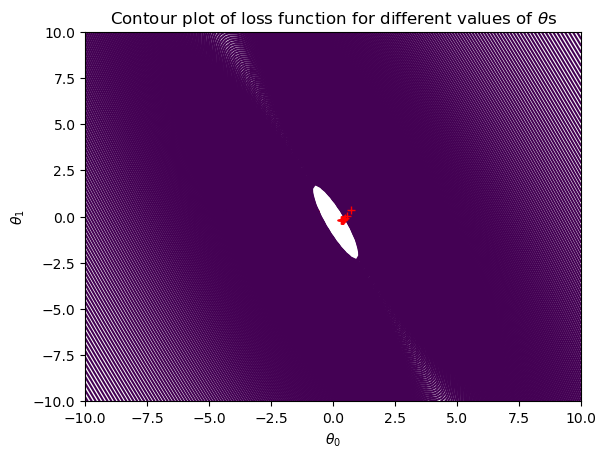

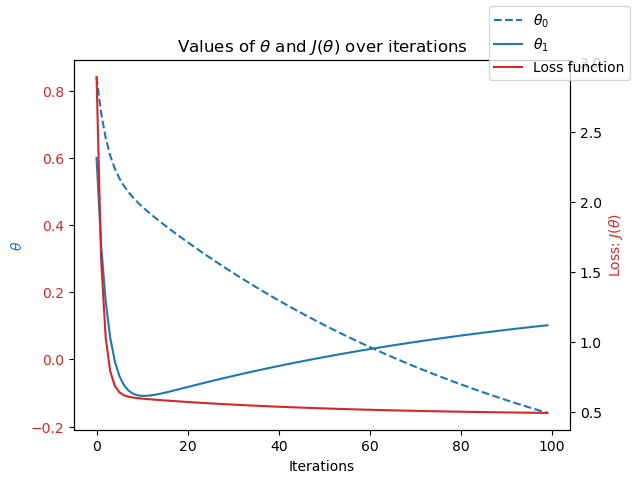

In [364]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [365]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 8.22 s
Wall time: 8.49 s


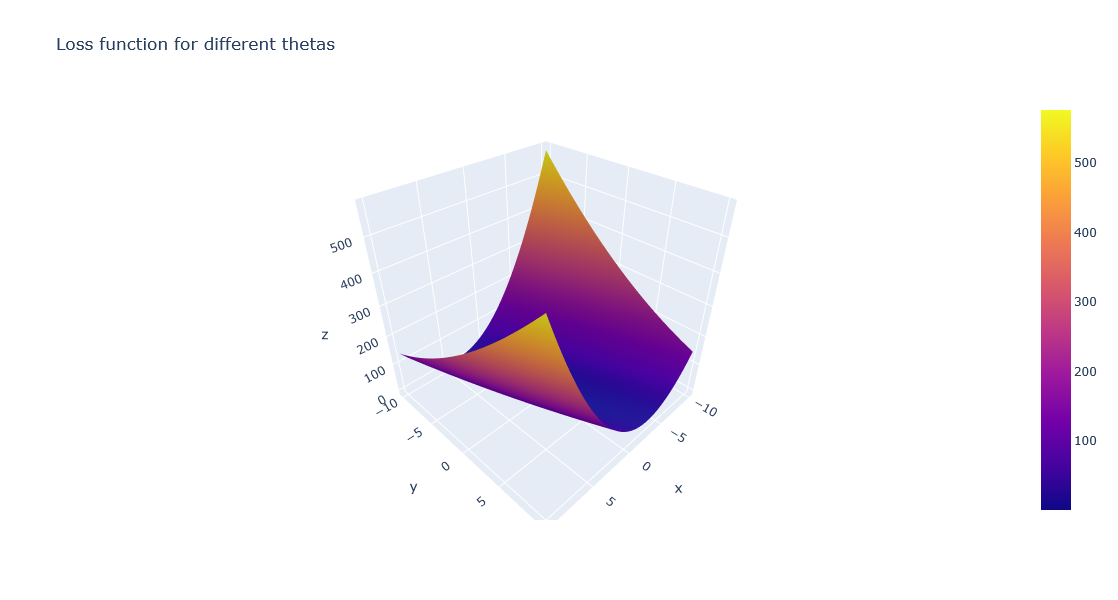

In [367]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### Stockholm 1960

In [261]:
#Reduce your dataset to a single year
dfyear4 = df[df['DATE'].astype(str).str.contains('1960')] #<-----INSERT YEAR HERE
dfyear4

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0    19600101      1        -0.528623           -1.016876           -1.099163   
1    19600102      1        -0.582946           -1.107669           -1.110927   
2    19600103      1        -0.257010           -1.084971           -1.063873   
3    19600104      1        -0.555784           -1.209812           -1.146217   
4    19600105      1        -1.003946           -1.209812           -1.087400   
..        ...    ...              ...                 ...                 ...   
361  19601227     12        -1.289140           -1.277907           -1.440302   
362  19601228     12        -1.289140           -1.255208           -1.416775   
363  19601229     12        -1.207656           -1.221161           -1.122690   
364  19601230     12        -1.547172           -1.243859           -1.169744   
365  19601231     12        -1.139752           -1.107669           -1.216797   

     DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0           -0.114356             -0.105836         -0.927601   
1           -0.367511             -0.370915         -0.825294   
2           -0.509912             -0.532908         -0.940389   
3           -0.525734             -0.577088         -1.042696   
4           -0.320045             -0.444548         -0.978754   
..                ...                   ...               ...   
361         -1.126979             -0.974707         -0.940389   
362         -1.522534             -1.283966         -0.978754   
363         -1.570001             -1.313420         -1.234521   
364         -1.316845             -1.372326         -0.889236   
365         -1.032045             -1.048340         -1.145003   

     HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0             -0.106469         -0.182904            -1.370824   
1             -0.892676         -0.212437            -1.043881   
2             -0.490837         -0.389635            -0.741156   
3             -0.316124         -0.493001            -0.910682   
4             -0.403481         -0.552067            -0.862246   
..                  ...               ...                  ...   
361           -1.469228         -0.891697            -1.721985   
362           -1.469228         -1.054129            -1.479805   
363           -1.434286         -1.305160            -1.443478   
364           -1.084860         -1.393759            -1.273952   
365           -1.137274         -1.172261            -1.286061   

     MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
0               -0.097084         -0.988280           -0.265742   
1               -0.232112         -0.691740           -0.353714   
2               -0.487164         -0.853490           -0.403983   
3               -0.472161         -0.624345           -0.642763   
4               -0.307127         -0.381721           -0.906678   
..                    ...               ...                 ...   
361             -0.997267         -1.069155           -1.120324   
362             -1.342338         -1.338737           -1.321402   
363             -1.342338         -0.920885           -1.459643   
364             -1.177304         -0.772615           -1.547614   
365             -0.937255         -1.136550           -1.195728   

     OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  \
0         -0.186575       -1.280450            -0.124331            -0.391072   
1         -0.368598       -0.539569            -0.650834            -0.415953   
2         -0.550620       -0.876333            -0.650834            -0.615003   
3         -0.417137       -0.775304            -0.943336            -0.764290   
4         -0.332193       -0.926848            -0.621584            -0.503037   
..              ...             ...                  ...                  ...   
361       -0.417137       -1.785596            -0.914086            -0.403513   
362      

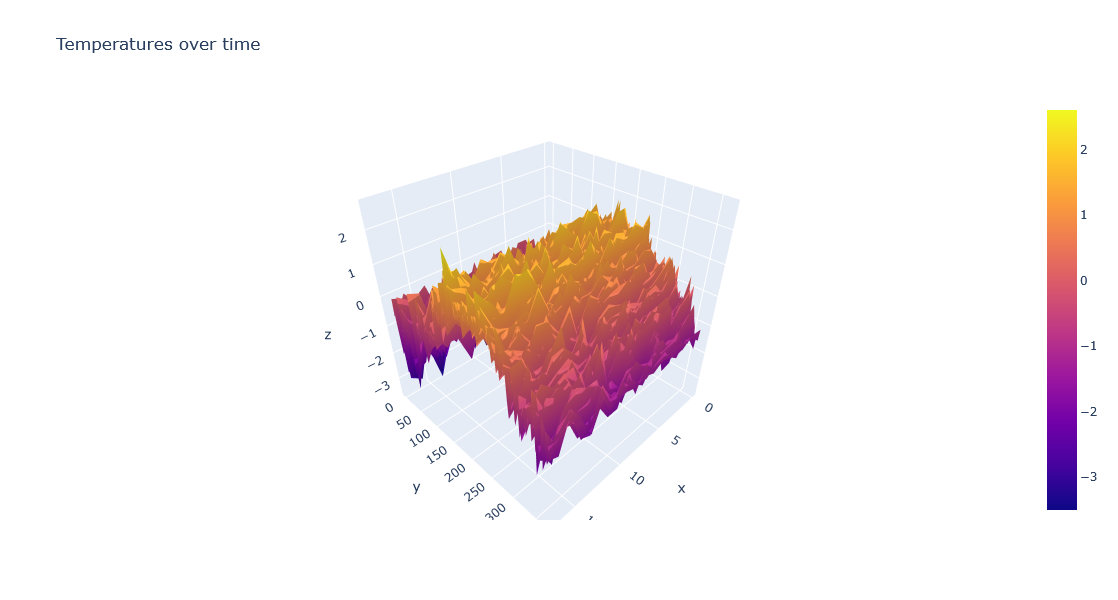

In [263]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear4 = dfyear4.drop(['DATE','MONTH'], axis=1)

#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear4.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [273]:
# Determine the number of rows/days in the DataFrame for the year
n_rows4 = dfyear4.shape[0]  # This should be 365 for a non-leap year or 366 for a leap year

# Create an index array with exactly n_rows4 elements.
# Each day is scaled by 0.01 so that day 1 = 0.01 and day n = 0.01 * n_rows4
i = np.linspace(0.01, 0.01 * n_rows4, n_rows4)

# Create a DataFrame for the index
index = pd.DataFrame(data=i, columns=['index'])

# Create the X matrix.
# First, convert the index DataFrame to a numpy array and reshape it to (n_rows4, 1)
X = index.to_numpy().reshape(n_rows4, 1)

# Create a column of ones for the intercept (x_0)
ones = np.ones((n_rows4, 1))

# Concatenate the ones column with the index values to form the X matrix
X = np.concatenate((ones, X), axis=1)

# Create the y vector from the weather data column for Stockholm
y = dfyear4['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows4, 1)


In [275]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear4['STOCKHOLM_temp_mean'].min()

-2.356683584001993

In [277]:
    #what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear4['STOCKHOLM_temp_mean'].max()

1.6865044645383225

In [279]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [143]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [281]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 78.1 ms
Wall time: 82.7 ms


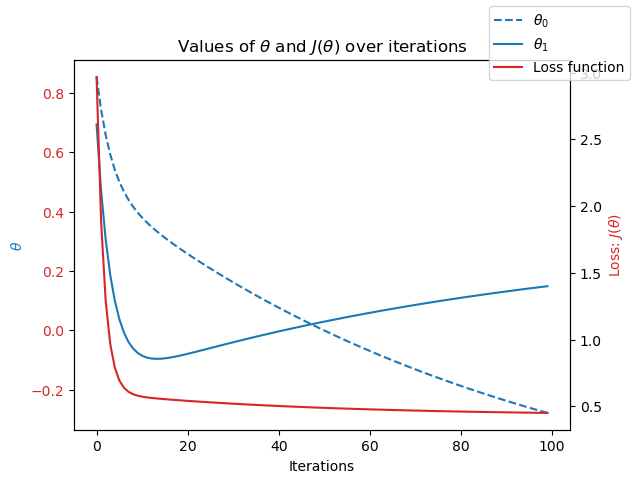

In [283]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [285]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 6.78 s
Wall time: 6.94 s


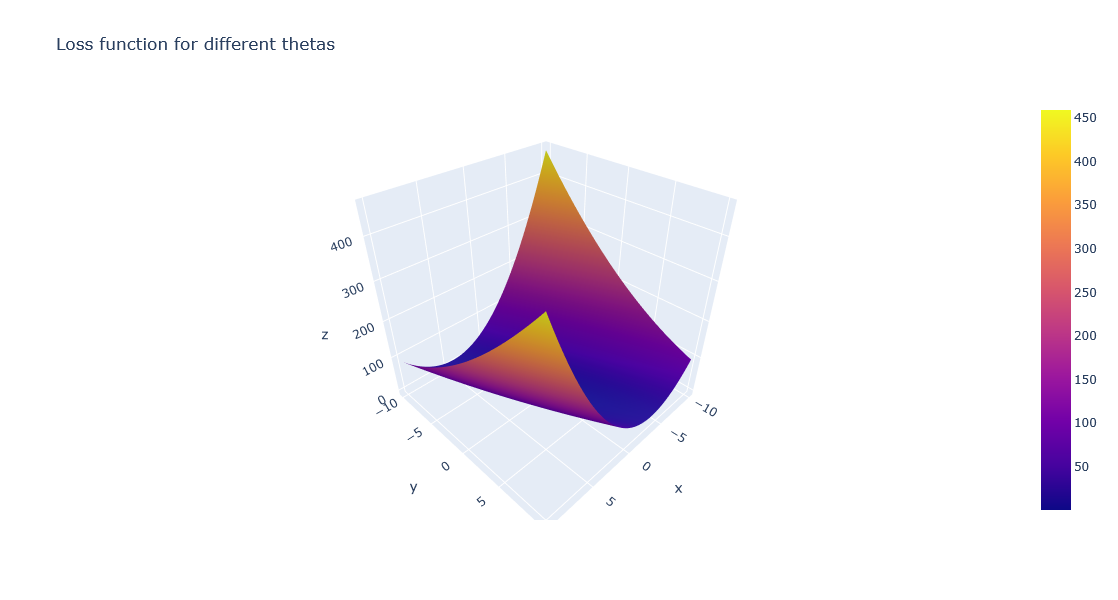

In [286]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

### STOCKHOLM 2021

In [229]:
#Reduce your dataset to a single year
dfyear5 = df[df['DATE'].astype(str).str.contains('2021')] #<-----INSERT YEAR HERE
dfyear5

DATE  MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
771    19620210      2        -1.139752           -1.289256   
772    19620211      2        -1.139752           -1.380049   
773    19620212      2        -0.528623           -0.892036   
774    19620213      2        -1.085430           -0.369975   
775    19620214      2        -1.465688           -1.391398   
...         ...    ...              ...                 ...   
22691  20220215      2        -0.745913           -0.108944   
22692  20220216      2        -0.243429           -0.313229   
22693  20220217      2         0.218313           -0.120294   
22694  20220218      2         0.055345           -0.188388   
22695  20220219      2        -0.555784           -0.074897   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
771             -1.169744         -0.937112             -0.974707   
772             -1.216797         -0.921290             -0.989434   
773             -1.122690         -0.399156             -0.488728   
774             -0.628627         -1.174445             -1.372326   
775             -1.099163         -1.316845             -1.401779   
...                   ...               ...                   ...   
22691           -0.005167         -0.399156             -0.488728   
22692           -0.005167          0.170444              0.026704   
22693           -0.005167         -0.161822             -0.120563   
22694           -0.005167         -0.256756             -0.253102   
22695           -0.005167         -0.620667             -0.650721   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
771           -0.914813           -1.137274         -0.965530   
772           -0.659045           -1.049918         -0.847397   
773           -0.710199           -0.735435         -0.670199   
774           -1.119426           -1.014975         -1.187028   
775           -1.196156           -1.539113         -1.438059   
...                 ...                 ...               ...   
22691         -0.556739           -0.648078         -0.005705   
22692         -0.326548            0.033301         -0.005705   
22693         -0.211453           -0.193825         -0.005705   
22694         -0.403278           -0.351067         -0.005705   
22695         -0.339337           -0.787848         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
771              -1.068099             -1.057280         -1.338737   
772              -1.201298             -0.892246         -1.217425   
773              -0.934900             -0.517170         -0.893927   
774              -0.862246             -1.282325         -0.826531   
775              -1.201298             -1.492368         -0.988280   
...                    ...                   ...               ...   
22691            -0.704829             -0.457158         -1.015239   
22692            -0.656393              0.097955         -0.691740   
22693            -0.450540             -0.142094         -0.556950   
22694            -0.244687             -0.217109         -0.422159   
22695            -0.341559             -0.637194         -0.772615   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
771             -1.145458       -0.477811       -0.707951   
772             -1.120324       -0.635564       -0.556407   
773             -0.177771       -0.866127       -0.876333   
774             -0.956948       -0.951071       -1.213097   
775             -1.497345       -1.120958       -1.431994   
...                   ...             ...             ...   
22691           -0.529657       -0.514216       -0.000746   
22692           -0.290877       -0.587025       -0.000746   
22693            0.199251       -0.647699       -0.000746   
22694            0.136414       -0.708373       -0.000746   
22695           -0.441685       -0.805452       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
77

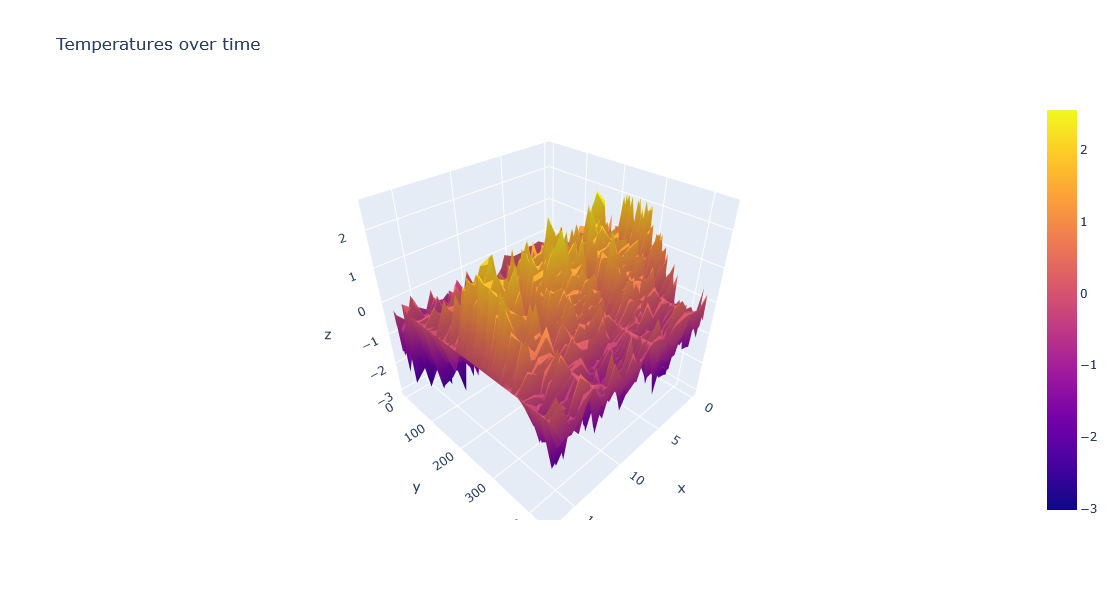

In [231]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear5 = dfyear5.drop(['DATE','MONTH'], axis=1)

#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear5.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [239]:
# Determine the number of rows from your dataframe
n_rows5 = dfyear5.shape[0]  # e.g., 366 or 429

# Generate an array with exactly n_rows5 elements using linspace
i = np.linspace(0.01, 0.01 * n_rows5, n_rows5)
index = pd.DataFrame(data=i, columns=['index'])

# Create the X matrix with a column of ones for the intercept and the index column
ones = np.ones((n_rows5, 1))
X = np.concatenate((ones, index.to_numpy().reshape(n_rows5, 1)), axis=1)

# Prepare the y vector from your weather data column
y = dfyear5['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows5, 1)


In [241]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear5['STOCKHOLM_temp_mean'].min()

-2.2944806909475264

In [245]:
    #what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear5['STOCKHOLM_temp_mean'].max()

2.35829570952656

In [246]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [247]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [248]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.05 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 172 ms
Wall time: 213 ms


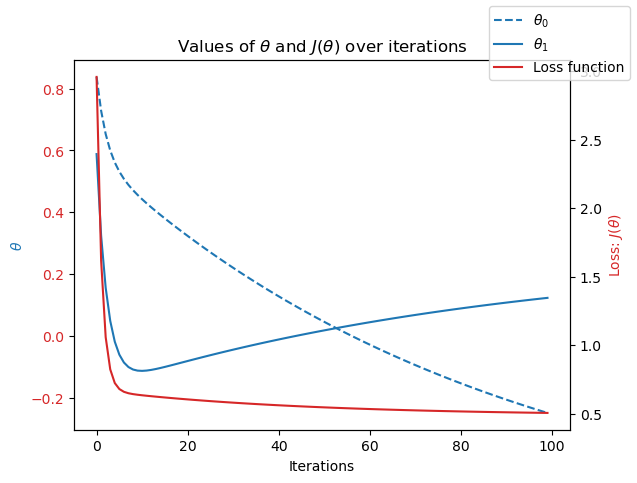

In [249]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [250]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 7.89 s
Wall time: 8.02 s


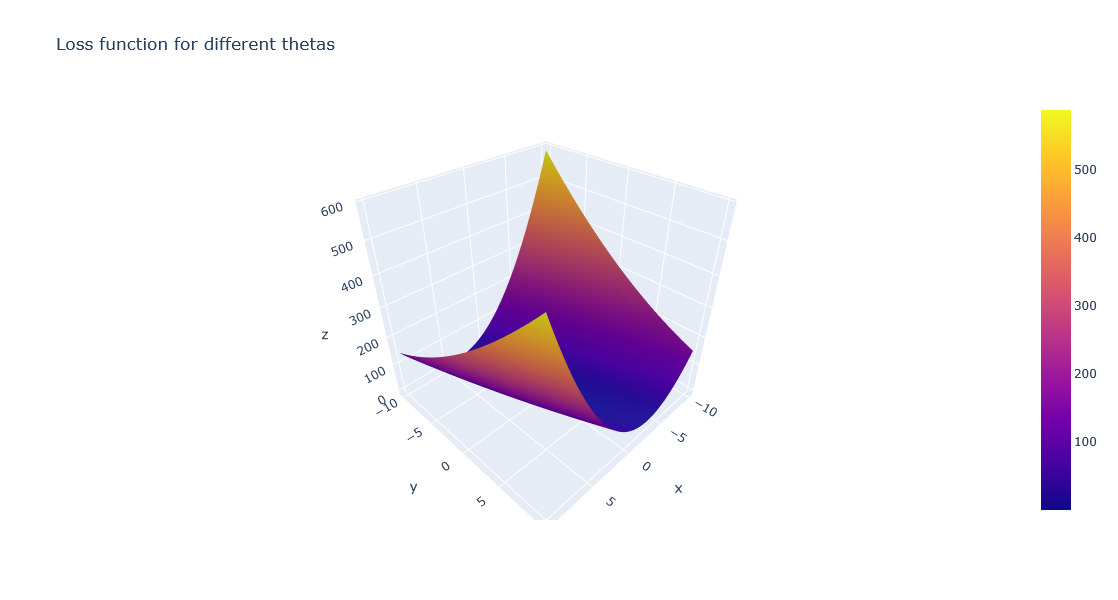

In [251]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()